# Linear regression

In [1]:
import tensorflow as tf
print(tf.__version__)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
2.5.0-rc0


### This is new chapter

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras import Model

Let's create noisy data (100 points) in form of `m * X + b = Y`:

In [38]:
def make_noisy_data(w=0.1, b=0.3, n=100):
    x = tf.random.uniform(shape=(n, ))
    noise = tf.random.normal(shape=(len(x), ), stddev=0.01)j
    y = w * x + b + noise
    return x, y

In [39]:
X, Y = make_noisy_data()

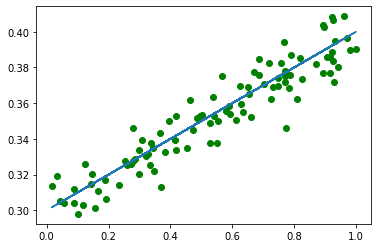

In [40]:
plt.plot(X, Y, 'go')
plt.plot(X, 0.1*X+0.3)

In [41]:
X

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([0.29772115, 0.05559051, 0.90687   , 0.19127452, 0.52664924,
       0.10095084, 0.3444265 , 0.528865  , 0.2806002 , 0.9267986 ,
       0.25345135, 0.14324212, 0.7461226 , 0.77295685, 0.08693159,
       0.7846744 , 0.9329109 , 0.50239027, 0.3836006 , 0.18866444,
       0.9146385 , 0.6864853 , 0.23316205, 0.67038   , 0.4532423 ,
       0.6869323 , 0.7312789 , 0.58936346, 0.36665547, 0.7892184 ,
       0.5677197 , 0.25970364, 0.6284872 , 0.39461267, 0.77146816,
       0.14607191, 0.8945793 , 0.33667505, 0.48727214, 0.16484046,
       0.81812155, 0.41528463, 0.6111356 , 0.7477933 , 0.9606495 ,
       0.9293716 , 0.01593184, 0.9171243 , 0.82608986, 0.4179666 ,
       0.6508479 , 0.12456465, 0.99922156, 0.41943598, 0.77126026,
       0.593894  , 0.77169454, 0.30693984, 0.9251828 , 0.86895156,
       0.7853844 , 0.9403666 , 0.55308473, 0.3335985 , 0.9233115 ,
       0.36852086, 0.65529156, 0.27876008, 0.72646856, 0.15480375,
       0.62625

(array([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0

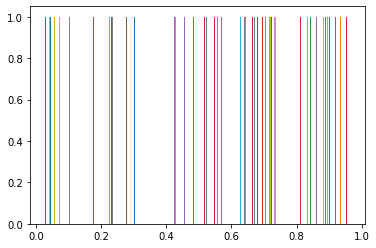

In [33]:
plt.hist(X, bins=5)

In [42]:
w = tf.Variable(0.)
b = tf.Variable(0.)

In [9]:
def predict(x):
    y = w * x + b
    return y

In [10]:
def mean_squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [11]:
loss = mean_squared_error(predict(X), Y)
print("Starting loss", loss.numpy())

Starting loss 0.12222569


In [49]:
learning_rate = 0.05
steps = 200

for i in range(steps):

    with tf.GradientTape() as tape:
        predictions = predict(X)
        loss = mean_squared_error(predictions, Y)

    gradients = tape.gradient(loss, [w, b])

    w.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)

    if i % 20 == 0:
        print("Step %d, Loss %f" % (i, loss.numpy()))

Step 0, Loss 0.125741
Step 20, Loss 0.000745
Step 40, Loss 0.000262
Step 60, Loss 0.000226
Step 80, Loss 0.000199
Step 100, Loss 0.000178
Step 120, Loss 0.000161
Step 140, Loss 0.000147
Step 160, Loss 0.000137
Step 180, Loss 0.000128


In [48]:
print("After {} steps we learned that w={} and b={}".format(steps, w.numpy(), b.numpy()))

After 200 steps we learned that w=0.0 and b=0.0


In [47]:
print(w.numpy(), b.numpy())

0.0 0.0


In [46]:
w.numpy(), b.numpy()

(0.0, 0.0)

In [45]:
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

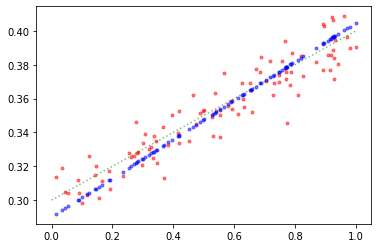

In [54]:
plt.plot(X, Y, 'r.', alpha=0.5)
plt.plot([0,1], [0.1*0+0.3, 0.1*1+0.3], 'g:', alpha=0.5)
plt.plot(X, predict(X), 'b.', alpha=0.5)

Step 0, Loss 0.000107
Step 20, Loss 0.000106
Step 40, Loss 0.000106
Step 60, Loss 0.000106
Step 80, Loss 0.000105
Step 100, Loss 0.000105
Step 120, Loss 0.000104
Step 140, Loss 0.000104
Step 160, Loss 0.000104
Step 180, Loss 0.000103


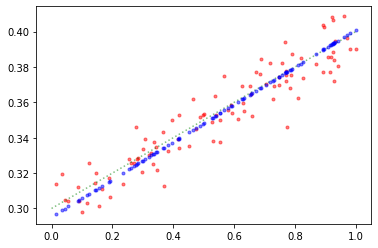

In [57]:
learning_rate = 0.01
steps = 200

for i in range(steps):

    with tf.GradientTape() as tape:
        predictions = predict(X)
        loss = mean_squared_error(predictions, Y)

    gradients = tape.gradient(loss, [w, b])

    w.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)

    if i % 20 == 0:
        print("Step %d, Loss %f" % (i, loss.numpy()))
        
plt.plot(X, Y, 'r.', alpha=0.5)
plt.plot([0,1], [0.1*0+0.3, 0.1*1+0.3], 'g:', alpha=0.5)
plt.plot(X, predict(X), 'b.', alpha=0.5)

In [58]:
min_loss = mean_squared_error(0.1*X+0.3, Y)
print("Minimum loss", min_loss.numpy())

Minimum loss 9.917671e-05


In [59]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=0.0010330762>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-0.0005997952>]

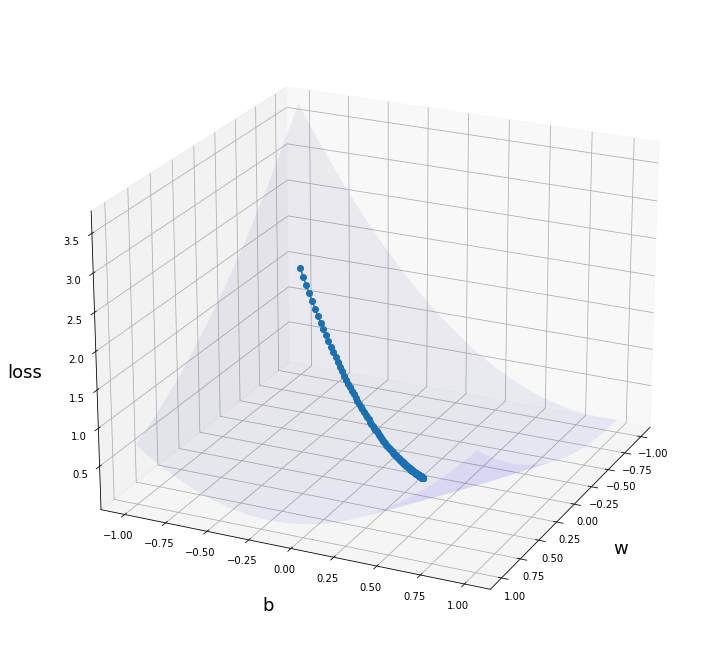

In [60]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

ws = np.linspace(-1, 1)
bs = np.linspace(-1, 1)
w_mesh, b_mesh = np.meshgrid(ws, bs)


def loss_for_values(w, b):
    y = w * X + b
    loss = mean_squared_error(y, Y)
    return loss


zs = np.array([
    loss_for_values(w, b) for (w, b) in zip(np.ravel(w_mesh), np.ravel(b_mesh))
])
z_mesh = zs.reshape(w_mesh.shape)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w_mesh, b_mesh, z_mesh, color='b', alpha=0.06)

w = tf.Variable(-.5)
b = tf.Variable(-.75)

history = []

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = predict(X)
        loss = mean_squared_error(predictions, Y)
    gradients = tape.gradient(loss, [w, b])
    history.append((w.numpy(), b.numpy(), loss.numpy()))
    w.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)

# Plot the trajectory
ax.plot([h[0] for h in history], [h[1] for h in history],
        [h[2] for h in history],
        marker='o')

ax.set_xlabel('w', fontsize=18, labelpad=20)
ax.set_ylabel('b', fontsize=18, labelpad=20)
ax.set_zlabel('loss', fontsize=18, labelpad=20)

ax.view_init(elev=22, azim=25)
plt.show()